In [105]:
from typing import Tuple
import glob
import pylab as p
from PIL import Image, ImageFont, ImageDraw
import colorsys
import os
import matplotlib.pyplot as plt
import numpy as np
from typing import Dict


In [77]:

# Get the file paths
im_file = 'gray.png'

im = np.asarray(Image.open(im_file))
# # convert your lists into a numpy array of size (N, H, W, C)
# image = np.array(image_plt)
# 


In [97]:
im

array([[[  0,   0,   0,   0],
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        ...,
        [  0,   0,   0,   0],
        [  0,   0,   0,   0],
        [  0,   0,   0,   0]],

       [[  0,   0,   0,   0],
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        ...,
        [  0,   0,   0,   0],
        [  0,   0,   0,   0],
        [  0,   0,   0,   0]],

       [[  0,   0,   0,   0],
        [  0,   0,   0,   0],
        [  0,   0,   0,   0],
        ...,
        [  0,   0,   0,   0],
        [  0,   0,   0,   0],
        [  0,   0,   0,   0]],

       ...,

       [[  0,   0,   0,   0],
        [  0,   0,   0,   0],
        [  0,   0,   0,   0],
        ...,
        [  0,   0,   0,   0],
        [  0,   0,   0,   0],
        [  0,   0,   0,   0]],

       [[  0,   0,   0,   0],
        [  0,   0,   0,   0],
        [  0,   0,   0,   0],
        ...,
        [  0,   0,   0,   0],
        [  0,   0,   0,   0],
        [  0,   0,   0,   0]],

       [[  0

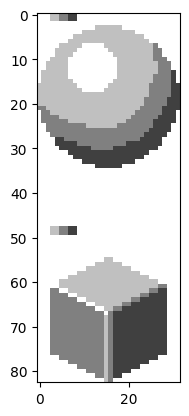

In [79]:
plt.imshow(im)

In [80]:
image_pixels = im.reshape(-1, 4)

In [81]:
from collections import defaultdict

unique_colours = set()
color_to_position = defaultdict(lambda: [])
for i, row in enumerate(im):
    for j, cell in enumerate(row):
        if cell[3] == 255:
            uni = cell[0]
            unique_colours.add(uni)
            color_to_position[uni].append((i, j))
            if not (cell[0]==cell[1] and cell[0]==cell[2]):
                print(f'error in {i, j}, cell: {cell}')

In [82]:
unique_colours

{64, 128, 192, 255}

In [83]:
color_nd_to_position = {}
for nk, ok in enumerate(sorted(color_to_position)):
    color_nd_to_position[nk] = color_to_position[ok]

In [84]:
color_nd_to_position

{0: [(0, 7),
  (0, 8),
  (1, 7),
  (1, 8),
  (13, 30),
  (14, 30),
  (15, 30),
  (16, 30),
  (16, 31),
  (17, 30),
  (17, 31),
  (18, 30),
  (18, 31),
  (19, 29),
  (19, 30),
  (19, 31),
  (20, 29),
  (20, 30),
  (20, 31),
  (21, 28),
  (21, 29),
  (21, 30),
  (21, 31),
  (22, 28),
  (22, 29),
  (22, 30),
  (23, 27),
  (23, 28),
  (23, 29),
  (23, 30),
  (24, 26),
  (24, 27),
  (24, 28),
  (24, 29),
  (24, 30),
  (25, 26),
  (25, 27),
  (25, 28),
  (25, 29),
  (26, 25),
  (26, 26),
  (26, 27),
  (26, 28),
  (26, 29),
  (27, 24),
  (27, 25),
  (27, 26),
  (27, 27),
  (27, 28),
  (28, 4),
  (28, 5),
  (28, 23),
  (28, 24),
  (28, 25),
  (28, 26),
  (28, 27),
  (29, 4),
  (29, 5),
  (29, 6),
  (29, 7),
  (29, 8),
  (29, 20),
  (29, 21),
  (29, 22),
  (29, 23),
  (29, 24),
  (29, 25),
  (29, 26),
  (29, 27),
  (30, 5),
  (30, 6),
  (30, 7),
  (30, 8),
  (30, 9),
  (30, 10),
  (30, 11),
  (30, 17),
  (30, 18),
  (30, 19),
  (30, 20),
  (30, 21),
  (30, 22),
  (30, 23),
  (30, 24),
  (30, 25

In [85]:


def color_maker(hue: int) -> Tuple[
    Tuple[int, int, int, int], 
    Tuple[int, int, int, int], 
    Tuple[int, int, int, int], 
    Tuple[int, int, int, int]]:
    
    return (
        make_color0(hue),     
        make_color1(hue), 
        make_color2(hue), 
        make_color3(hue),) 


def make_color3(hue: int) -> Tuple[int, int, int, int]:
    return hsv2rgba((hue+5)%360, 80, 100)

def make_color2(hue: int) -> Tuple[int, int, int, int]:
    return hsv2rgba(hue, 100, 100)

def make_color1(hue: int) -> Tuple[int, int, int, int]:
    return hsv2rgba((hue-5)%360, 100, 80)

def make_color0(hue: int) -> Tuple[int, int, int, int]:
    return hsv2rgba((hue-10)%360, 100, 40)


def hsv2rgba(h,s,v) -> Tuple[int, int, int, int]:
    return tuple(round(i * 255) for i in colorsys.hsv_to_rgb(h/360,s/100,v/100)) + (255, )



In [86]:
hsv2rgba(0, 100, 100)

(255, 0, 0, 255)

In [87]:
im.shape

(83, 32, 4)

In [165]:
colors: Dict = {hue: color_maker(hue) for hue in range(360)}
hue = 180
cor = colors[hue]
new_im = np.full(im.shape, (0,0,0,0), dtype='uint8')


In [166]:
for color_nd, posis in color_nd_to_position.items():
    for i, j in posis:
        new_im[i, j] = cor[color_nd]

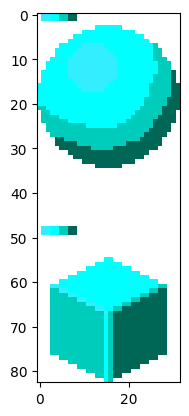

In [167]:
plt.imshow(new_im)
plt.imsave('coisa.png', new_im)

In [168]:
img_from_array = Image.fromarray(new_im)

In [169]:
img_from_array.size

(32, 83)

In [170]:
img_from_array.width

32

In [182]:
res_img = Image.new('RGBA', (100,img_from_array.height))
res_img.paste(img_from_array)
img_writer = ImageDraw.Draw(res_img)
r, g, b, _ = hsv2rgba(hue, 100, 100)
img_writer.text((60, 10), "HUE", fill=(r, g, b))
img_writer.text((60, 20), str(hue), fill=(r, g, b))
img_writer.text((40, 30), "R", fill=(250, 0, 0))
img_writer.text((40, 40), str(r), fill=(250, 0, 0))
img_writer.text((60, 30), "G", fill=(0, 255, 0))
img_writer.text((60, 40), str(g), fill=(0, 255, 0))
img_writer.text((80, 30), "B", fill=(0, 0, 255))
img_writer.text((80, 40), str(b), fill=(0, 0, 255))


In [183]:
res_img.show()


In [177]:
Im.text((6, 5), "Marilyn Monroe", fill=(250, 0, 0))

In [121]:
img.show()

In [92]:
def make_img_from(hue, cor: Tuple) -> np.ndarray:
    new_im = np.full(im.shape, (0,0,0,0), dtype='uint8')
    
    for color_nd, posis in color_nd_to_position.items():
        for i, j in posis:
            new_im[i, j] = cor[color_nd]
    return new_im

In [189]:
imgs_dir = 'output/images/'
os.makedirs(imgs_dir, exist_ok=True)
gif_dir = 'output/animation/'
os.makedirs(gif_dir, exist_ok=True)


In [190]:
colors: Dict = {hue: color_maker(hue) for hue in range(360)}
for hue, cor in colors.items():
    img_array = make_img_from(hue, cor)
    img_from_array = Image.fromarray(img_array)
    
    Image.
    res_img = Image.new('RGBA', (100,img_from_array.height))
    res_img.paste(img_from_array)
    img_writer = ImageDraw.Draw(res_img)
    r, g, b, _ = hsv2rgba(hue, 100, 100)
    img_writer.text((60, 10), "HUE", fill=(r, g, b))
    img_writer.text((60, 20), str(hue), fill=(r, g, b))
    img_writer.text((40, 30), "R", fill=(250, 0, 0))
    img_writer.text((40, 40), str(r), fill=(250, 0, 0))
    img_writer.text((60, 30), "G", fill=(0, 255, 0))
    img_writer.text((60, 40), str(g), fill=(0, 255, 0))
    img_writer.text((80, 30), "B", fill=(0, 0, 255))
    img_writer.text((80, 40), str(b), fill=(0, 0, 255))

    res_img.save(imgs_dir+f'img{hue:03d}.png')
    res_img.close()
    


In [95]:
f'{21:03d}'

'021'

In [195]:
frames = [Image.open(image) for image in glob.glob(f"{imgs_dir}/*.png")]
frame_one = frames[0]
frame_one.save("animation.gif", format="GIF", append_images=frames,
               save_all=True, duration=100, loop=0, disposal=2)

In [103]:
frames

[<PIL.PngImagePlugin.PngImageFile image mode=RGBA size=32x83>,
 <PIL.PngImagePlugin.PngImageFile image mode=RGBA size=32x83>,
 <PIL.PngImagePlugin.PngImageFile image mode=RGBA size=32x83>,
 <PIL.PngImagePlugin.PngImageFile image mode=RGBA size=32x83>,
 <PIL.PngImagePlugin.PngImageFile image mode=RGBA size=32x83>,
 <PIL.PngImagePlugin.PngImageFile image mode=RGBA size=32x83>,
 <PIL.PngImagePlugin.PngImageFile image mode=RGBA size=32x83>,
 <PIL.PngImagePlugin.PngImageFile image mode=RGBA size=32x83>,
 <PIL.PngImagePlugin.PngImageFile image mode=RGBA size=32x83>,
 <PIL.PngImagePlugin.PngImageFile image mode=RGBA size=32x83>,
 <PIL.PngImagePlugin.PngImageFile image mode=RGBA size=32x83>,
 <PIL.PngImagePlugin.PngImageFile image mode=RGBA size=32x83>,
 <PIL.PngImagePlugin.PngImageFile image mode=RGBA size=32x83>,
 <PIL.PngImagePlugin.PngImageFile image mode=RGBA size=32x83>,
 <PIL.PngImagePlugin.PngImageFile image mode=RGBA size=32x83>,
 <PIL.PngImagePlugin.PngImageFile image mode=RGBA size=

In [192]:

num_key_frames = 8

with Image.open('animation.gif') as im:
    for i in range(num_key_frames):
        im.seek(im.n_frames // num_key_frames * i)
        im.save(f'coisa{i}.png'.format(i))